![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [158]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
# load csv file and store as netflix_df
netflix_df = pd.read_csv("netflix_data.csv")

# check if correct dataframe is loaded in 
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [160]:
# Filter netflix_df to remove tv shows and store as netflix_subset
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']

# Inspect netflix_subset
netflix_subset.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action


In [161]:
# Create new dataframe called netflix movies, with columns "title", "country", "genre", "release_year", and "duration"
netflix_movies = netflix_subset.drop(columns = ["show_id", "type", "director", "cast", "date_added", "description"])

# inspect netflix_movies dataframe
netflix_movies.head(3)

,title,country,release_year,duration,genre
1,7:19,Mexico,2016,93,Dramas
2,23:59,Singapore,2011,78,Horror Movies
3,9,United States,2009,80,Action


In [162]:
# Filter netflix_movies that are strictly shorter than 60minutes, and save as short movies.
# Inspect possible contributing factors
short_movies = netflix_movies[netflix_movies['duration'] < 60]

# Inspect short_movies dataframe
short_movies.head(3)

,title,country,release_year,duration,genre
35,#Rucker50,United States,2016,56,Documentaries
55,100 Things to do Before High School,United States,2014,44,Uncategorized
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,2017,37,Uncategorized


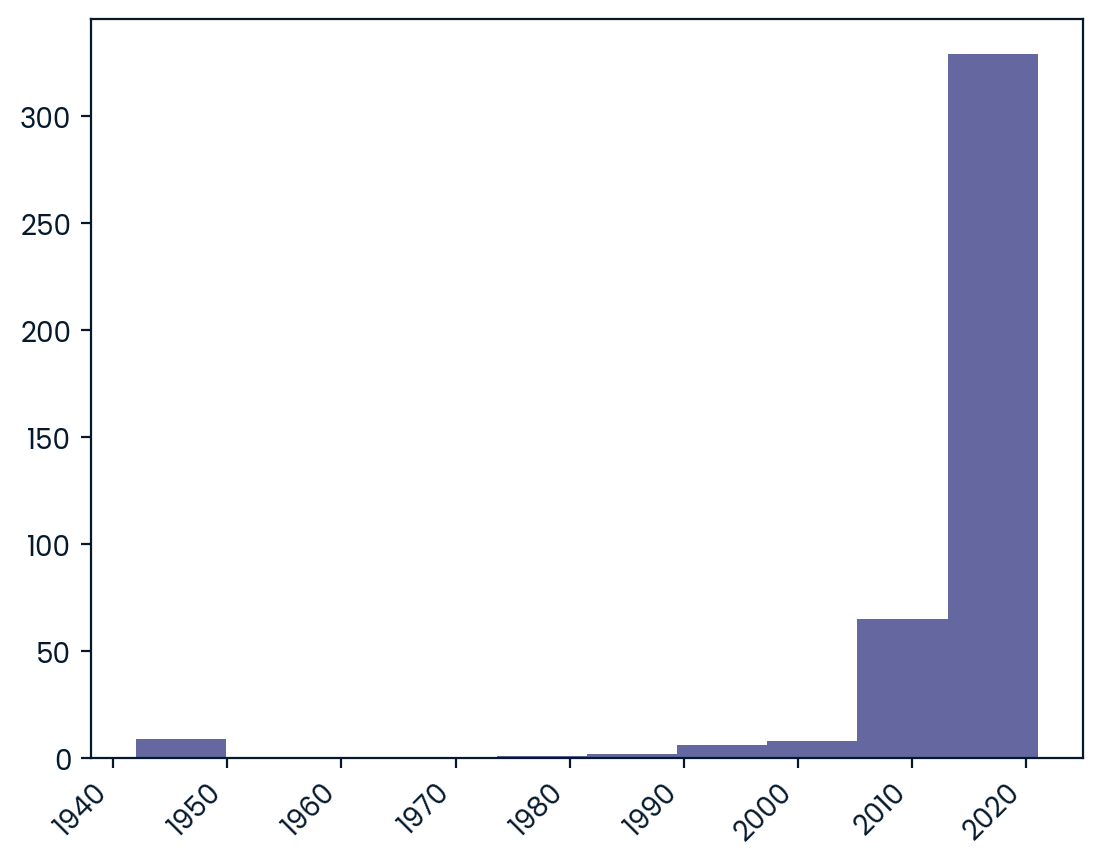

<function matplotlib.pyplot.clf()>

In [163]:
# Create visualization based on release_year  
plt.hist("release_year", data = short_movies)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf

Observation:
1. Of all the short movies, most of the short movies were made in 2020

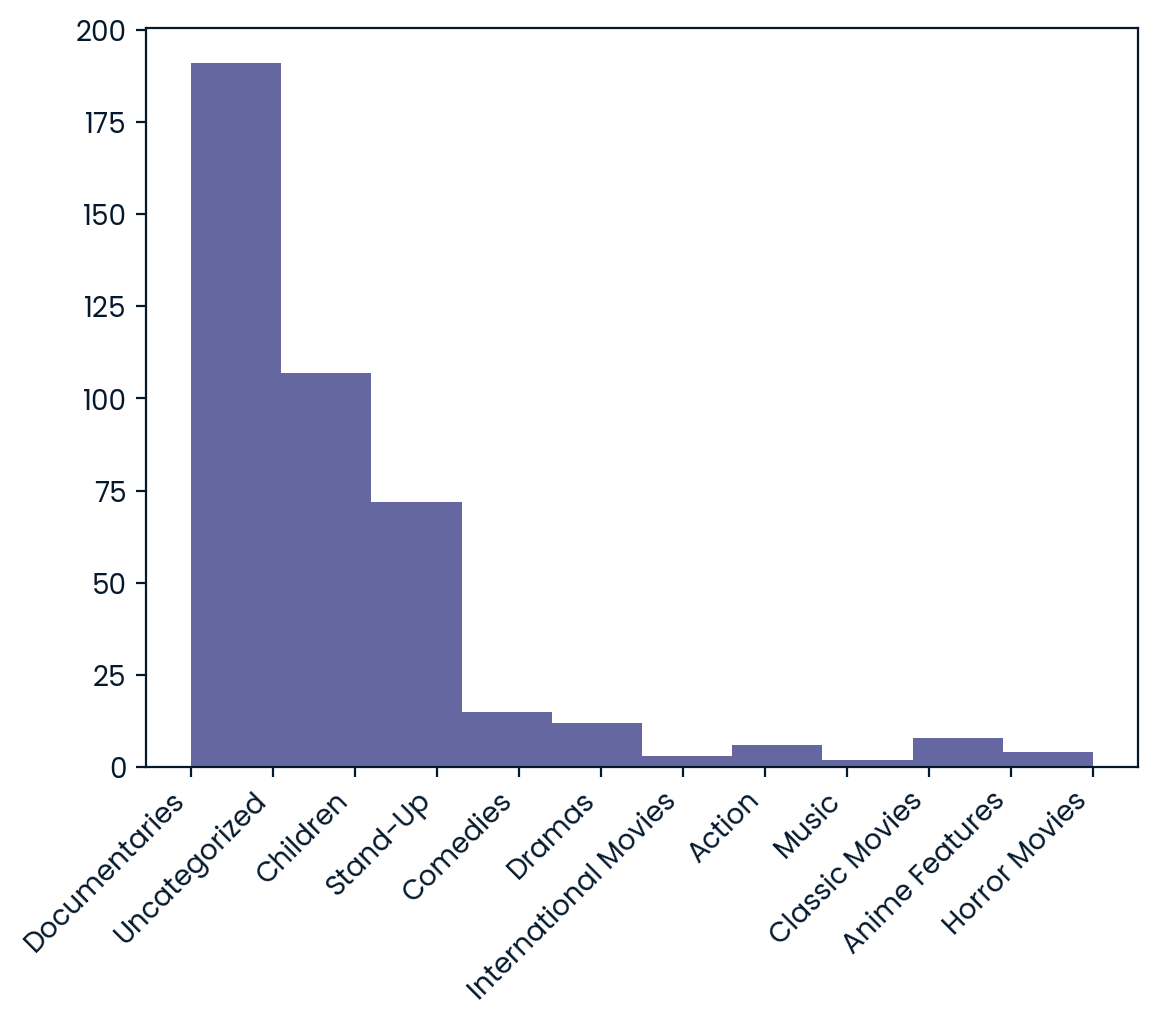

<Figure size 640x480 with 0 Axes>

In [164]:
# Create visualization based on release_year  
plt.hist("genre", data = short_movies)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

**Observation**
1. Most of the short movies were documentaries, followed by uncategorized, children and then stand-up.

In [165]:
# Using loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. 

# Create pandas dataframe to access to iterate over rows
netflix_pddf = pd.DataFrame(netflix_movies, columns = ["show_id", "type", "title", "director", "cast", "country", "date_added", "release_year", "duration", "description", "genre"])

# Create an empty list to store the assigned colors
colors = []  

# create loop with if/elif statements
for i, row in netflix_pddf.iterrows():
    if row['genre'] == "Children":
        colors.append("pink")
    elif row['genre'] == "Documentaries":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append("yellow")
    else:
        colors.append("grey")

# Add a new column 'color' to the DataFrame with the assigned colors
netflix_pddf['color'] = colors

print(netflix_pddf)

      show_id  type  ...          genre  color
1         NaN   NaN  ...         Dramas   grey
2         NaN   NaN  ...  Horror Movies   grey
3         NaN   NaN  ...         Action   grey
4         NaN   NaN  ...         Dramas   grey
6         NaN   NaN  ...  Horror Movies   grey
...       ...   ...  ...            ...    ...
7781      NaN   NaN  ...       Children   pink
7782      NaN   NaN  ...         Dramas   grey
7783      NaN   NaN  ...         Dramas   grey
7784      NaN   NaN  ...  Documentaries   blue
7786      NaN   NaN  ...  Documentaries   blue

[5377 rows x 12 columns]


Text(0.5, 1.0, 'Movie Duration by Year of Release')

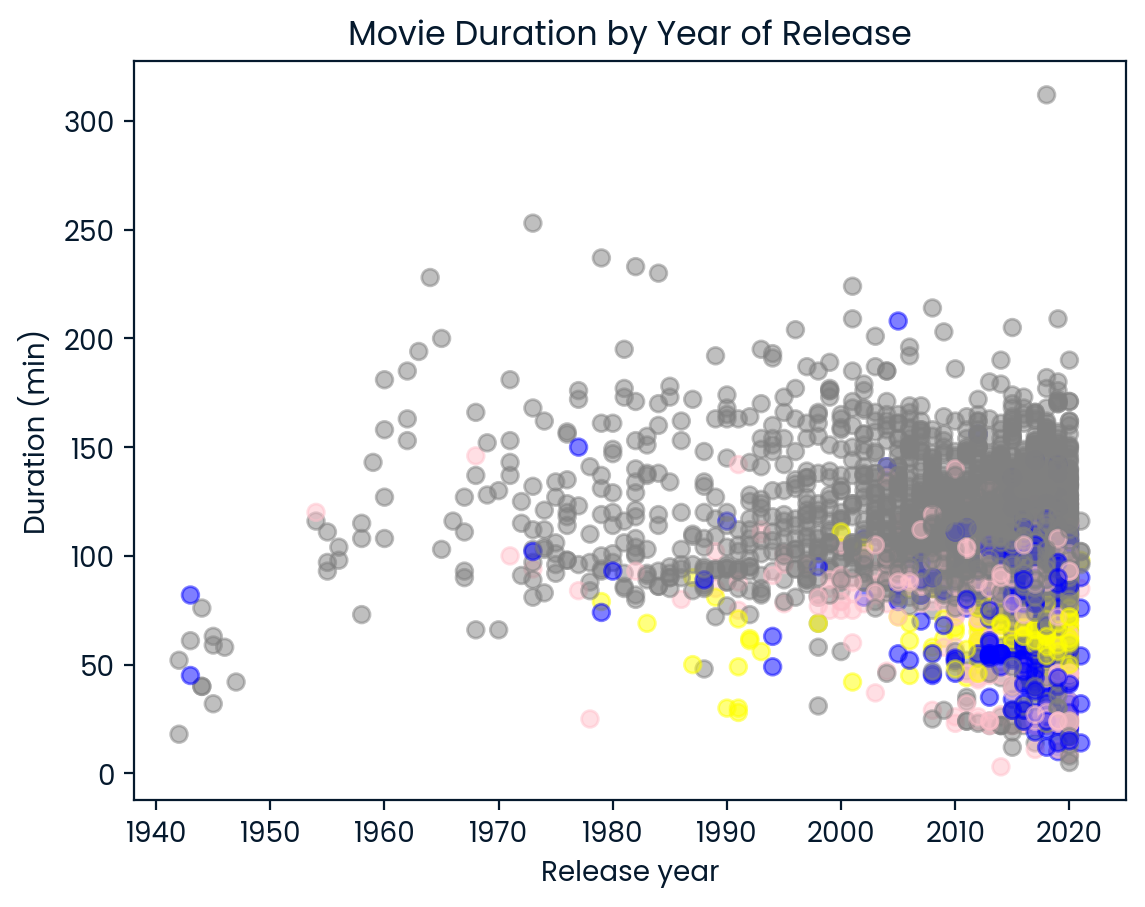

In [166]:
# Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".
fig = plt.figure()

plt.scatter(x = "release_year", y ="duration", data = netflix_pddf, c = colors, alpha = 0.5)
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")

In [167]:
# After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer 
answer = "no"